## 1. Constructing the networks

In [3]:
# Importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import requests
import copy
import numpy as np

In [4]:
# Importing graphml file for London's rail network
G = nx.read_graphml('london.graphml')
# = nx.read_graphml(requests.get('https://raw.githubusercontent.com/kav-sekar/us_london_network/main/london.graph.xml'))

In [5]:
type(G)

networkx.classes.graph.Graph

In [6]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [8]:
#since coords tuples are stored as string, need to convert them back to tuples using eval() (inverted coma)
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [9]:
# Adding station name as attribute
nod_name = list(G.nodes())
for index, node in enumerate(G.nodes()):
    G.nodes[node]["station_name"] = nod_name[index]

list(G.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'station_name': 'Wembley Park'})

In [10]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'flows': 12356, 'length': 2916.7715580506483, 'line_name': 'Jubilee'})

In [11]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'flows': 12356,
  'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'station_1_': 'Wembley Park',
  'station_2_': 'Kingsbury'})

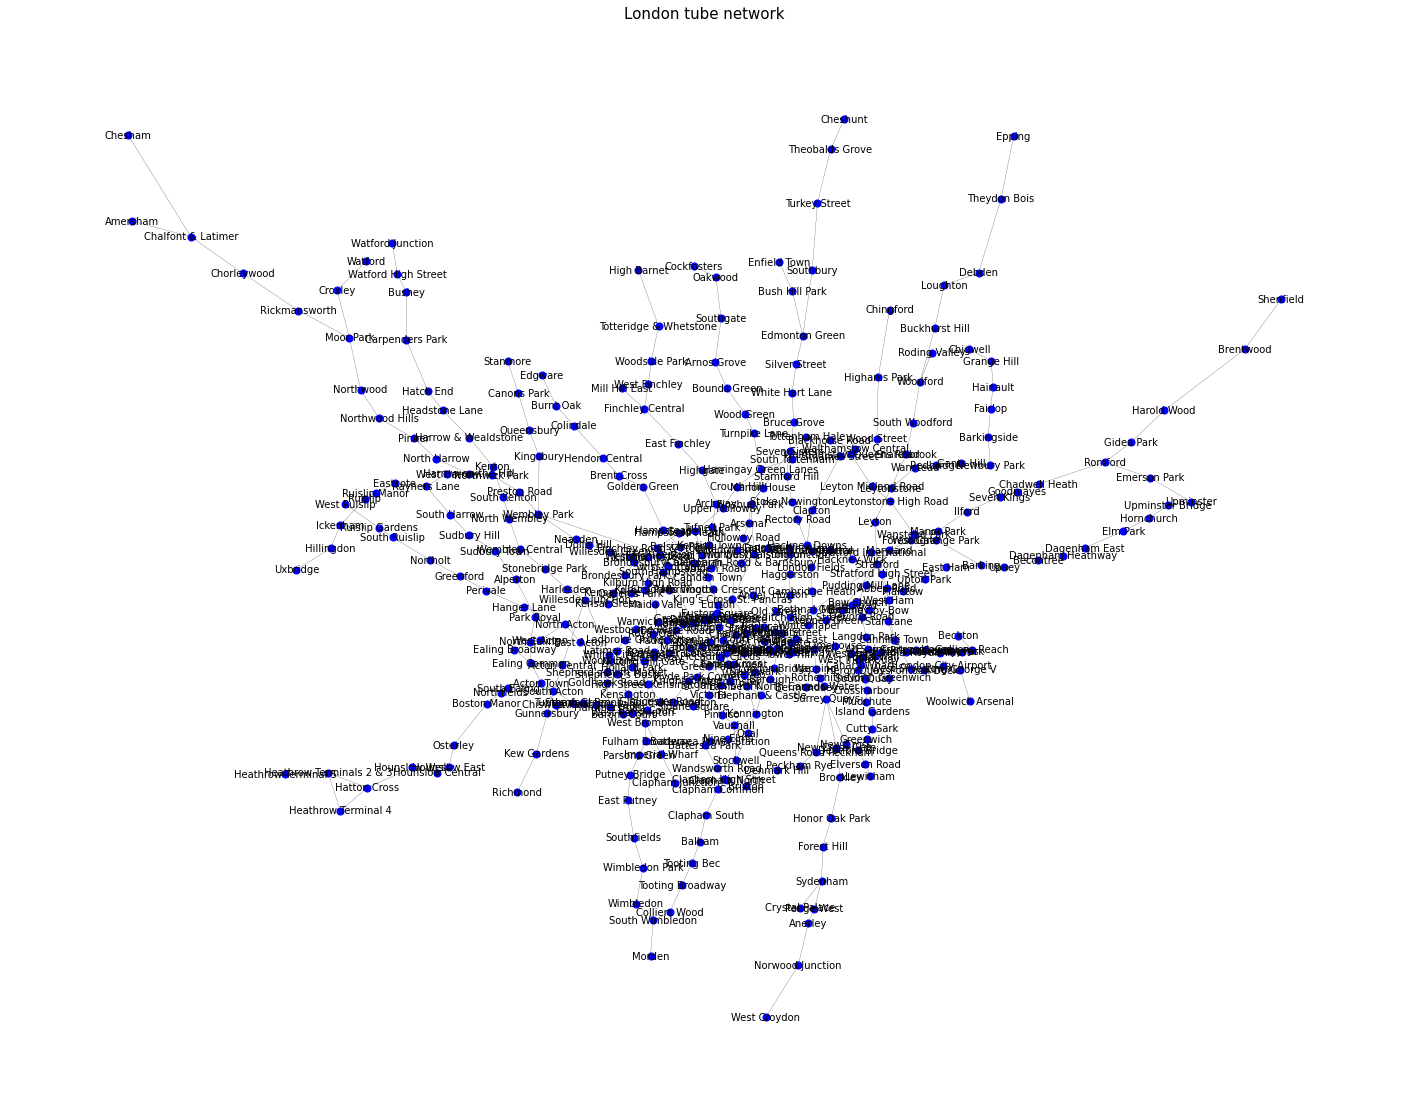

In [12]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [13]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,station_2_,length,flows,station_1_,line_name
0,Wembley Park,Kingsbury,Kingsbury,2916.771558,12356,Wembley Park,Jubilee
1,Wembley Park,Neasden,Neasden,2353.165938,6744,Wembley Park,Jubilee
2,Wembley Park,Preston Road,Preston Road,1419.735166,36601,Wembley Park,Metropolitan
3,Wembley Park,Finchley Road,Finchley Road,7266.373927,55216,Wembley Park,Metropolitan
4,Kingsbury,Queensbury,Queensbury,1245.995234,9419,Kingsbury,Jubilee
5,Queensbury,Canons Park,Canons Park,1693.307343,6385,Queensbury,Jubilee
6,Canons Park,Stanmore,Stanmore,1419.669476,3624,Canons Park,Jubilee
7,Stratford,West Ham,West Ham,1673.509515,91801,Stratford,Jubilee
8,Stratford,Mile End,Mile End,2805.001392,12010,Stratford,Central
9,Stratford,Leyton,Leyton,2131.342926,56082,Stratford,Central


## 2.  Exploring the network

In [14]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.37392749648

In [15]:
#if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'flows': 55216,
  'length': 7266.37392749648,
  'line_name': 'Metropolitan',
  'station_1_': 'Wembley Park',
  'station_2_': 'Finchley Road'})

In [16]:
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['length'] == max_dist]
furthest_stat

[('Wembley Park', 'Finchley Road')]

In [17]:
#if want to know to which stations Baker Street is directly connected to

Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [18]:
#if want to know to which stations Baker Street is directly connected to but we don't know if is written with the space 

Baker = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Bond Street', 'Baker Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [19]:
#if want to know the edges connecting Baker Street station:

Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Bond Street',
  'Baker Street',
  {'flows': 112517,
   'length': 1744.2782307078057,
   'line_name': 'Jubilee',
   'station_1_': 'Bond Street',
   'station_2_': 'Baker Street'}),
 ('Baker Street',
  "St. John's Wood",
  {'flows': 10477,
   'length': 2138.930092928529,
   'line_name': 'Jubilee',
   'station_1_': 'Baker Street',
   'station_2_': "St. John's Wood"}),
 ('Baker Street',
  'Great Portland Street',
  {'flows': 48306,
   'length': 826.8194453063362,
   'line_name': 'Hammersmith & City',
   'station_1_': 'Baker Street',
   'station_2_': 'Great Portland Street'}),
 ('Baker Street',
  'Edgware Road',
  {'flows': 63428,
   'length': 1034.840367463597,
   'line_name': 'Hammersmith & City',
   'station_1_': 'Baker Street',
   'station_2_': 'Edgware Road'}),
 ('Baker Street',
  'Finchley Road',
  {'flows': 71854,
   'length': 3534.6372473145702,
   'line_name': 'Metropolitan',
   'station_1_': 'Baker Street',
   'station_2_': 'Finchley Road'}),
 ('Baker Street',
  'Marylebone',
  

In [20]:
# diameter of the network
nx.diameter(G)

36

In [21]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78581.28589029584

## 3.  Centrality measures

#### Degree Centrality on nodes:

In [22]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')


In [23]:
# To dataframe using the nodes as the index
df_degree_Centrality = pd.DataFrame(index=G.nodes())
df_degree_Centrality['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_degree_Centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_degree_Centrality_sorted = df_degree_Centrality.sort_values(["degree"], ascending=False)
df_degree_Centrality_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


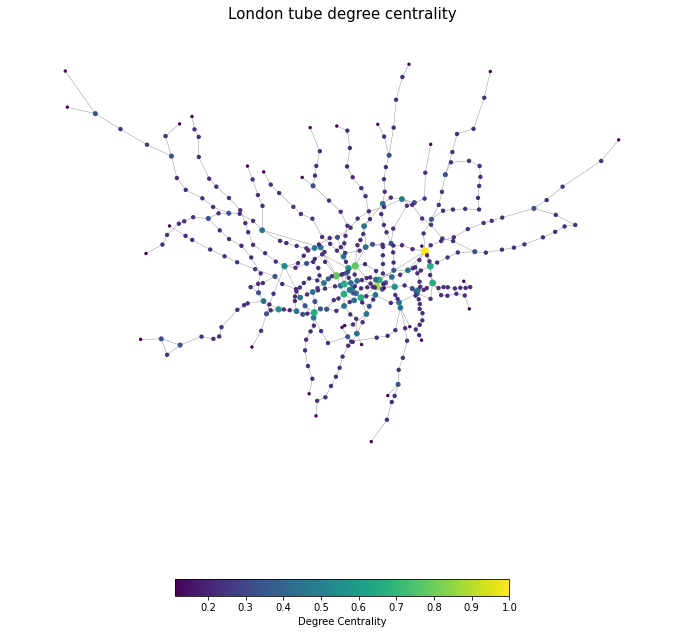

In [24]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Weighted Degree Centrality on nodes:

In [25]:
# Degree centrality for weighted graph
degree = G.degree(weight='flows')
max_degree = max(dict(degree).values())
degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]
keys = list(deg_london.keys())
degree_weighted = dict(zip(keys, degree_centrality_weighted))  
nx.set_node_attributes(G,dict(degree_weighted),'degree_weighted')

In [26]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree_weighted'] = pd.Series(nx.get_node_attributes(G, 'degree_weighted'))

df_sorted = df.sort_values(["degree_weighted"], ascending=False)
df_sorted[0:10]

,station_name,degree_weighted
Green Park,Green Park,1.000000
Bank and Monument,Bank and Monument,0.983378
Waterloo,Waterloo,0.935976
Westminster,Westminster,0.757043
King's Cross St. Pancras,King's Cross St. Pancras,0.715843
Liverpool Street,Liverpool Street,0.637716
Stratford,Stratford,0.579918
Euston,Euston,0.563755
Bond Street,Bond Street,0.511985
Baker Street,Baker Street,0.503757


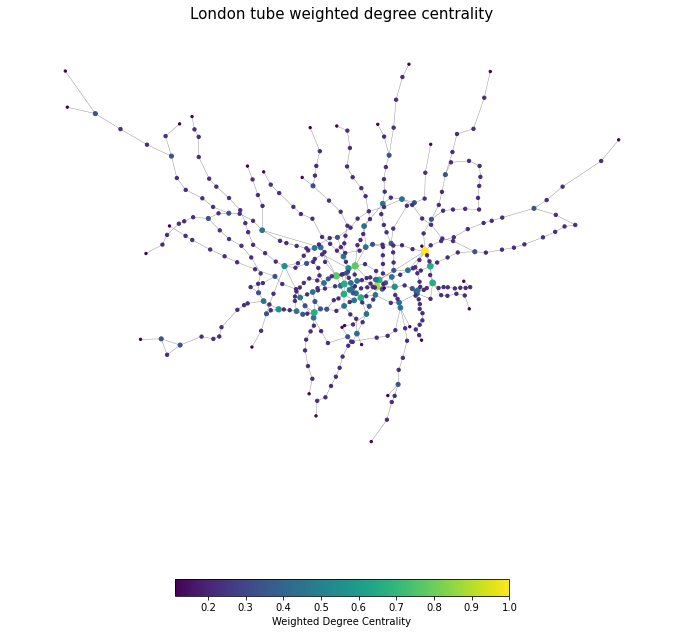

In [27]:
# Lets set colour and size of nodes according to betweenness values
degree_weighted_values=[(i[1]['degree_weighted']) for i in G.nodes(data=True)]

degree_weighted_color=[(i[1]['degree_weighted']/(max(degree_values))) for i in G.nodes(data=True)]
degree_weighted_size=[(i[1]['degree_weighted']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted degree centrality",fontsize=15)
plt.show()

#### Eigenvector Centrality on nodes:

In [28]:
#  We can calculate the degree centrality using networkx function:
eigen_london =nx.eigenvector_centrality(G, max_iter = 200)
nx.set_node_attributes(G,dict(eigen_london),'eigen')

In [29]:
# To dataframe using the nodes as the index
df_eigen_centrality = pd.DataFrame(index=G.nodes())
df_eigen_centrality['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_eigen_centrality['eigen'] = pd.Series(nx.get_node_attributes(G, 'eigen'))

df_eigen_centrality_sorted = df_eigen_centrality.sort_values(["eigen"], ascending=False)
df_eigen_centrality_sorted[0:10]

,station_name,eigen
Bank and Monument,Bank and Monument,0.383427
Liverpool Street,Liverpool Street,0.328824
Stratford,Stratford,0.269179
Waterloo,Waterloo,0.249731
Moorgate,Moorgate,0.215137
Green Park,Green Park,0.197630
Oxford Circus,Oxford Circus,0.184094
Tower Hill,Tower Hill,0.171676
Westminster,Westminster,0.168610
Shadwell,Shadwell,0.159090


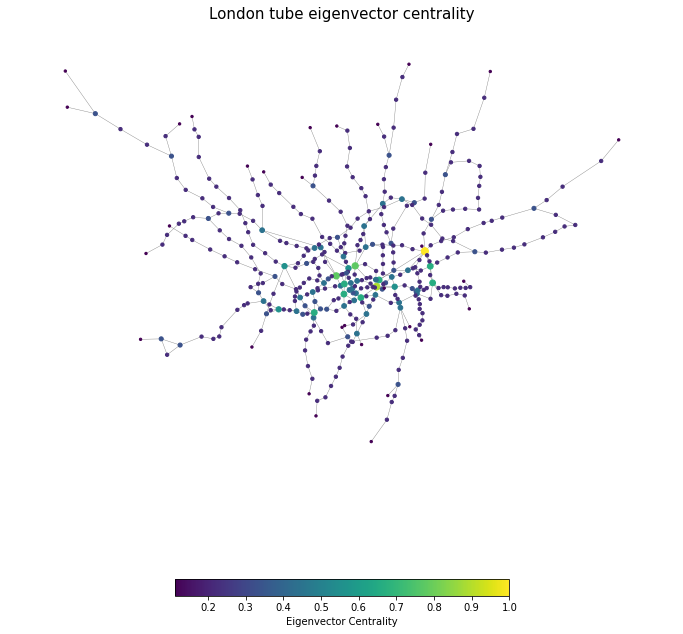

In [30]:
# Lets set colour and size of nodes according to betweenness values
eigen_values=[(i[1]['eigen']) for i in G.nodes(data=True)]

eigen_color=[(i[1]['eigen']/(max(eigen_values))) for i in G.nodes(data=True)]
eigen_size=[(i[1]['eigen']/(max(eigen_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube eigenvector centrality",fontsize=15)
plt.show()

#### Weighted Eigenvector Centrality on nodes:

In [31]:
#  We can calculate the degree centrality using networkx function:
weighted_eigen_london =nx.eigenvector_centrality(G, weight = 'flows', max_iter = 500)
nx.set_node_attributes(G,dict(weighted_eigen_london),'weighted_eigen')

In [32]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['weighted_eigen'] = pd.Series(nx.get_node_attributes(G, 'weighted_eigen'))

df_sorted = df.sort_values(["weighted_eigen"], ascending=False)
df_sorted[0:10]

,station_name,weighted_eigen
Waterloo,Waterloo,0.527355
Westminster,Westminster,0.481937
Bank and Monument,Bank and Monument,0.417409
Green Park,Green Park,0.374465
Liverpool Street,Liverpool Street,0.214570
Bond Street,Bond Street,0.156550
Oxford Circus,Oxford Circus,0.140253
Victoria,Victoria,0.132111
Moorgate,Moorgate,0.118185
Southwark,Southwark,0.100186


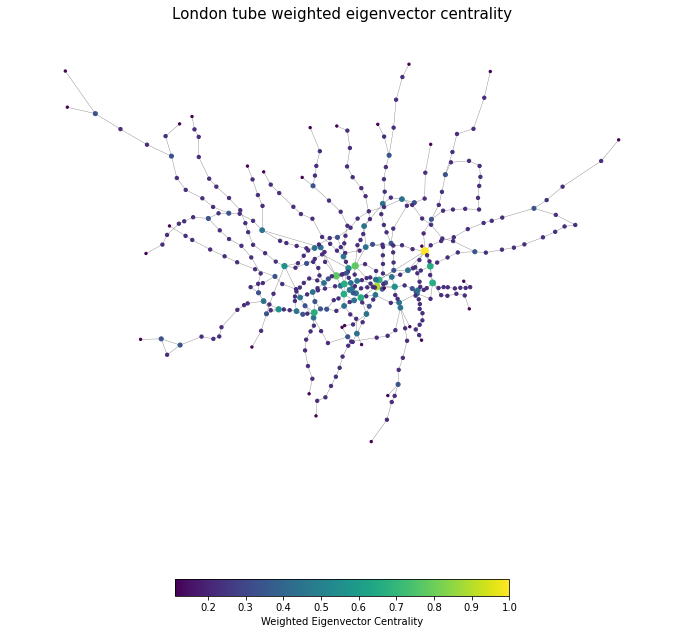

In [33]:
# Lets set colour and size of nodes according to betweenness values
weighted_eigen_values=[(i[1]['weighted_eigen']) for i in G.nodes(data=True)]

weighted_eigen_color=[(i[1]['weighted_eigen']/(max(eigen_values))) for i in G.nodes(data=True)]
weighted_eigen_size=[(i[1]['weighted_eigen']/(max(eigen_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted eigenvector centrality",fontsize=15)
plt.show()

### Topological betweenness centrality:

In [34]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df_betweenness_centrality = pd.DataFrame(index=G.nodes())
df_betweenness_centrality['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df_betweenness_centrality['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t')).round(decimals=2)

df_betweenness_centrality_sorted = df_betweenness_centrality.sort_values(["betweenness_t"], ascending=False)
df_betweenness_centrality_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.09
Bank and Monument,Bank and Monument,23181.06
Liverpool Street,Liverpool Street,21610.39
King's Cross St. Pancras,King's Cross St. Pancras,20373.52
Waterloo,Waterloo,19464.88
Green Park,Green Park,17223.62
Euston,Euston,16624.28
Westminster,Westminster,16226.16
Baker Street,Baker Street,15287.11
Finchley Road,Finchley Road,13173.76


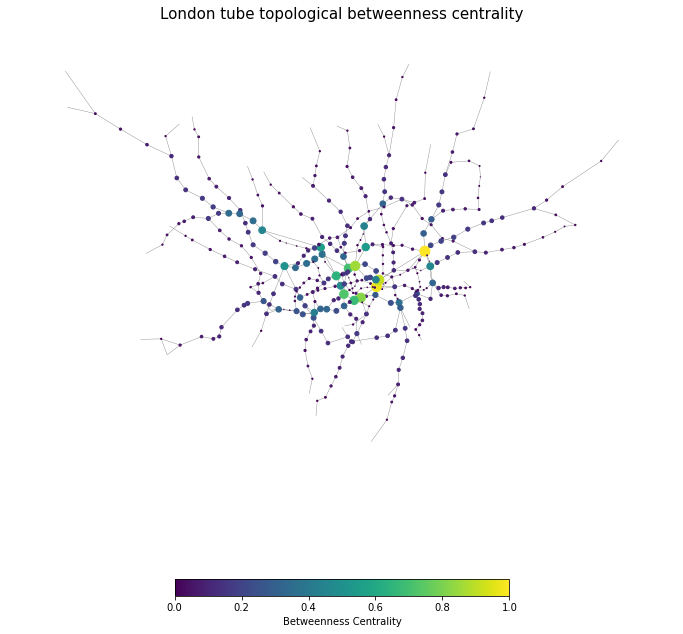

In [35]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Weighted Betweenness Centrality on nodes:

In [36]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [37]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
West Hampstead,West Hampstead,28401.50
Gospel Oak,Gospel Oak,21947.00
Finchley Road & Frognal,Finchley Road & Frognal,21446.00
Hampstead Heath,Hampstead Heath,21372.00
Willesden Junction,Willesden Junction,19166.50
Leicester Square,Leicester Square,17097.75
Brondesbury,Brondesbury,16526.00
Brondesbury Park,Brondesbury Park,16411.50
Kensal Rise,Kensal Rise,16299.75
Blackhorse Road,Blackhorse Road,16091.75


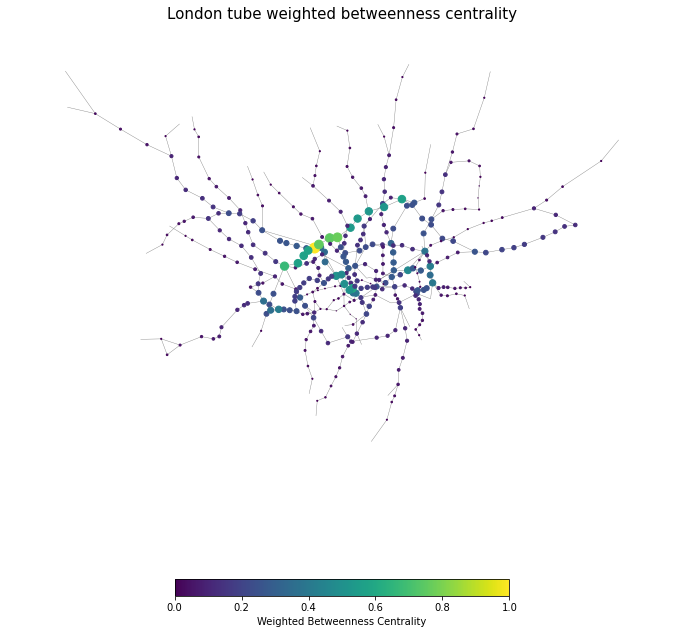

In [38]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted betweenness centrality",fontsize=15)
plt.show()

#### Number of connected components

In [39]:
# number of connected components
nx.number_connected_components(G)

#all stations are connected creating 1 single network

1

## 4.  Global measures

#### Network diameter

In [40]:
# Nework diameter
diam = nx.diameter(G)
print(f"Network diameter = ", diam)

Network diameter =  36


In [41]:
# Weighted network diameter
dia = {n:nx.single_source_dijkstra_path_length(G, n, weight='flows') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
print(f"Weighted network diameter = ", d)

Weighted network diameter =  78581.28589029584


#### Clustering coefficient

In [42]:
# Average clustering coefficient (C):
cluster_coeff = nx.average_clustering(G)
print(f"Average clustering coefficient = ", cluster_coeff)

Average clustering coefficient =  0.030382377389858693


In [43]:
# Weighted average clustering coefficient (C):
cluster_coeff_w = nx.average_clustering(G, weight = 'flows')
print(f"Weighted average clustering coefficient = ", cluster_coeff_w)

Weighted average clustering coefficient =  0.0015791877116043108


#### Average shortest path length

In [44]:
# Average shortest path length
avg_sh_path = nx.average_shortest_path_length(G)
print(f"Average shortest path length = ", avg_sh_path)

Average shortest path length =  13.545997506234414


In [45]:
# Weighted average shortest path length
avg_sh_path_w = nx.average_shortest_path_length(G, weight = 'flows')
print(f"Weighted average shortest path length = ", avg_sh_path_w)

Weighted average shortest path length =  255693.32300498753


Node Removal

In [46]:
G_for_degree_centrality=copy.deepcopy(G)
data=[]
for index, row in df_degree_Centrality_sorted[0:10].iterrows():
    G_for_degree_centrality.remove_node(row["station_name"])
    arr1= []
    for C in (G_for_degree_centrality.subgraph(c).copy() for c in nx.connected_components(G_for_degree_centrality)):
      arr1.append(nx.average_shortest_path_length(C))
    avg_sh_path = max(arr1)
    data.append([row['station_name'],nx.average_clustering(G_for_degree_centrality), (max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_degree_centrality)])),avg_sh_path])

degree_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','Network diameter','Average Shortest path length'] )


In [47]:
degree_centrality_node_removal

,node,average_clustering,Network diameter,Average Shortest path length
0,Stratford,0.030625,49,14.496447
1,Bank and Monument,0.030027,49,14.872497
2,King's Cross St. Pancras,0.030270,49,16.054927
3,Baker Street,0.027288,49,17.013376
4,Earl's Court,0.020539,50,17.375897
5,Oxford Circus,0.019072,50,17.557150
6,Liverpool Street,0.019120,50,17.562397
7,Waterloo,0.018066,51,18.185421
8,Green Park,0.019813,51,18.324780
9,Canning Town,0.016880,51,18.570151


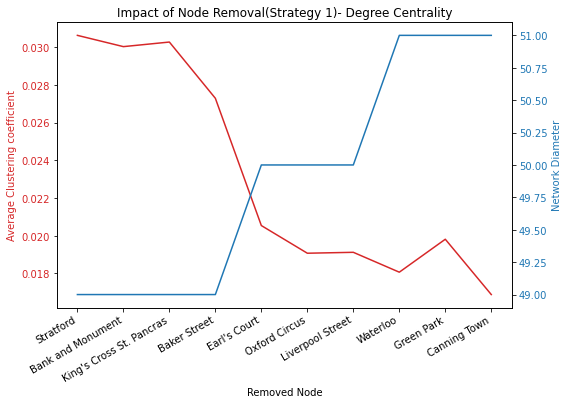

In [48]:
plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(degree_centrality_node_removal['node'],degree_centrality_node_removal['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(degree_centrality_node_removal['node'],degree_centrality_node_removal['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 1)- Degree Centrality')


plt.show()

In [49]:
G_for_degree_centrality2=copy.deepcopy(G)
data=[]
for i in range(10):
    deg_london =nx.degree_centrality(G_for_degree_centrality2)
    nx.set_node_attributes(G_for_degree_centrality2,dict(deg_london),'degree')
    df_degree_Centrality = pd.DataFrame(index=G_for_degree_centrality2.nodes())
    df_degree_Centrality['station_name'] = pd.Series(nx.get_node_attributes(G_for_degree_centrality2, 'station_name'))
    df_degree_Centrality['degree'] = pd.Series(nx.get_node_attributes(G_for_degree_centrality2, 'degree'))
    df_degree_Centrality_sorted = df_degree_Centrality.sort_values(["degree"], ascending=False)
    G_for_degree_centrality2.remove_node(df_degree_Centrality_sorted[0:1]['station_name'].item())
    station=df_degree_Centrality_sorted[0:1]['station_name'].item()
    data.append([i,station,nx.average_clustering(G_for_degree_centrality2),(max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_degree_centrality2)]))])

#degree_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','average_shortest_path_length'])
degree_centrality_node_removal2= pd.DataFrame(data, columns=['iteration','node','average_clustering','Network diameter'] )

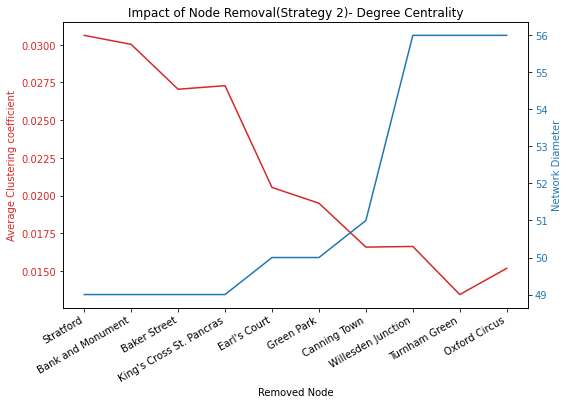

In [50]:

plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(degree_centrality_node_removal2['node'],degree_centrality_node_removal2['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(degree_centrality_node_removal2['node'],degree_centrality_node_removal2['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 2)- Degree Centrality')


plt.show()

##Eigen Centrality

In [51]:
G_for_eigen_centrality=copy.deepcopy(G)
data=[]
for index, row in df_eigen_centrality_sorted[0:10].iterrows():
    G_for_eigen_centrality.remove_node(row["station_name"])
    data.append([row['station_name'],nx.average_clustering(G_for_eigen_centrality),(max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_eigen_centrality)]))])

#degree_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','average_shortest_path_length'])
eigen_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','Network diameter'] )

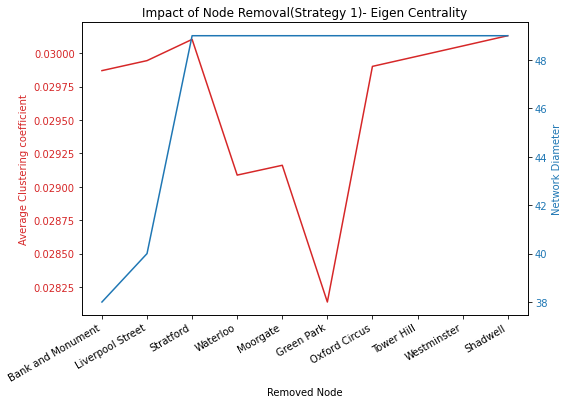

In [52]:
plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(eigen_centrality_node_removal['node'],eigen_centrality_node_removal['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(eigen_centrality_node_removal['node'],eigen_centrality_node_removal['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 1)- Eigen Centrality')


plt.show()

In [53]:
G_for_eigen_centrality2=copy.deepcopy(G)
data=[]
for i in range(10):
    eigen_london =nx.eigenvector_centrality(G_for_eigen_centrality2, max_iter = 1000)
    nx.set_node_attributes(G_for_eigen_centrality2,dict(eigen_london),'eigen')
    df_eigen_centrality = pd.DataFrame(index=G_for_eigen_centrality2.nodes())
    df_eigen_centrality['station_name'] = pd.Series(nx.get_node_attributes(G_for_eigen_centrality2, 'station_name'))
    df_eigen_centrality['eigen'] = pd.Series(nx.get_node_attributes(G_for_eigen_centrality2, 'eigen'))

    df_eigen_centrality_sorted = df_eigen_centrality.sort_values(["eigen"], ascending=False)
    
    G_for_eigen_centrality2.remove_node(df_eigen_centrality_sorted[0:1]['station_name'].item())
    station=df_eigen_centrality_sorted[0:1]['station_name'].item()
    data.append([i,station,nx.average_clustering(G_for_eigen_centrality2),(max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_eigen_centrality2)]))])

#degree_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','average_shortest_path_length'])
eigen_centrality_node_removal2= pd.DataFrame(data, columns=['iteration','node','average_clustering','Network diameter'] )

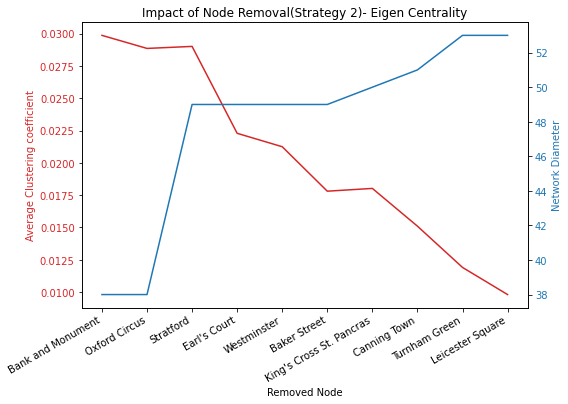

In [54]:
plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(eigen_centrality_node_removal2['node'],eigen_centrality_node_removal2['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(eigen_centrality_node_removal2['node'],eigen_centrality_node_removal2['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 2)- Eigen Centrality')


plt.show()

##Topological betweenness centrality:

In [55]:
G_for_betweenness_centrality=copy.deepcopy(G)
data=[]
for index, row in df_betweenness_centrality_sorted[0:10].iterrows():
    G_for_betweenness_centrality.remove_node(row["station_name"])
    data.append([row['station_name'],nx.average_clustering(G_for_betweenness_centrality),(max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_betweenness_centrality)]))])

betweenness_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','Network diameter'] )


In [56]:
betweenness_centrality_node_removal

,node,average_clustering,Network diameter
0,Stratford,0.030625,49
1,Bank and Monument,0.030027,49
2,Liverpool Street,0.030103,49
3,King's Cross St. Pancras,0.030347,49
4,Waterloo,0.029329,49
5,Green Park,0.028306,49
6,Euston,0.024994,49
7,Westminster,0.025058,49
8,Baker Street,0.021599,49
9,Finchley Road,0.021654,49


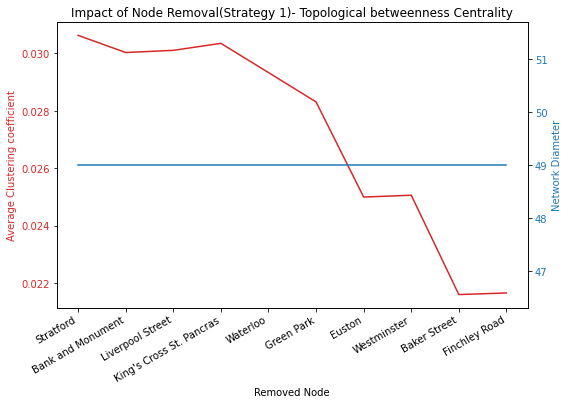

In [57]:
plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(betweenness_centrality_node_removal['node'],betweenness_centrality_node_removal['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(betweenness_centrality_node_removal['node'],betweenness_centrality_node_removal['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 1)- Topological betweenness Centrality')


plt.show()

In [58]:
#Let us compute the betweenness centrality for the network, without using weights:

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t')).round(decimals=2)

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.09
Bank and Monument,Bank and Monument,23181.06
Liverpool Street,Liverpool Street,21610.39
King's Cross St. Pancras,King's Cross St. Pancras,20373.52
Waterloo,Waterloo,19464.88
Green Park,Green Park,17223.62
Euston,Euston,16624.28
Westminster,Westminster,16226.16
Baker Street,Baker Street,15287.11
Finchley Road,Finchley Road,13173.76


In [59]:
G_for_betweenness_centrality2=copy.deepcopy(G)
data=[]
for i in range(10):
    bet_london_t=nx.betweenness_centrality(G_for_betweenness_centrality2, normalized=False)
    nx.set_node_attributes(G_for_betweenness_centrality2,bet_london_t,'betweenness_t')
    df_betweenness_centrality2 = pd.DataFrame(index=G_for_betweenness_centrality2.nodes())
    df_betweenness_centrality2['station_name'] = pd.Series(nx.get_node_attributes(G_for_betweenness_centrality2, 'station_name'))
    df_betweenness_centrality2['betweenness_t'] = pd.Series(nx.get_node_attributes(G_for_betweenness_centrality2, 'betweenness_t')).round(decimals=2)
    df_betweenness_centrality2_sorted = df_betweenness_centrality2.sort_values(["betweenness_t"], ascending=False)
    
    G_for_betweenness_centrality2.remove_node(df_betweenness_centrality2_sorted[0:1]['station_name'].item())
    station=df_betweenness_centrality2_sorted[0:1]['station_name'].item()
    data.append([i,station,nx.average_clustering(G_for_betweenness_centrality2),(max([max(j.values()) for (i,j) in nx.shortest_path_length(G_for_betweenness_centrality2)]))])

#degree_centrality_node_removal= pd.DataFrame(data, columns=['node','average_clustering','average_shortest_path_length'])
betweenness_centrality_node_removal2= pd.DataFrame(data, columns=['iteration','node','average_clustering','Network diameter'] )

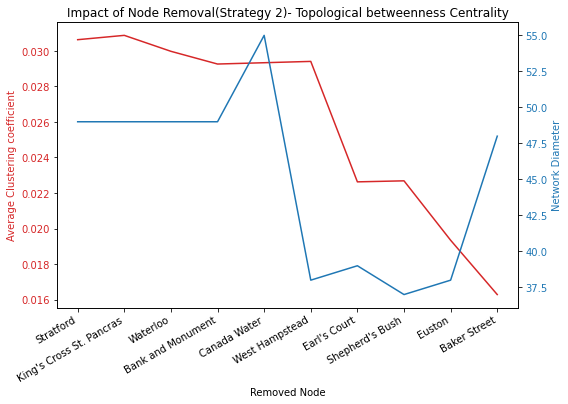

In [60]:
plt.rcParams["figure.figsize"] = (8,5.5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Removed Node')
ax1.set_ylabel('Average Clustering coefficient', color=color)
ax1.plot(betweenness_centrality_node_removal2['node'],betweenness_centrality_node_removal2['average_clustering'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 30, ha='right')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Network Diameter', color=color)  
ax2.plot(betweenness_centrality_node_removal2['node'],betweenness_centrality_node_removal2['Network diameter'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('Impact of Node Removal(Strategy 2)- Topological betweenness Centrality')


plt.show()

II.3

In [61]:
G_II_3=copy.deepcopy(G)

In [62]:
# Weighted average shortest path length
arr1= []
for C in (G_II_3.subgraph(c).copy() for c in nx.connected_components(G_II_3)):
    arr1.append(nx.average_shortest_path_length(C,  weight = 'flows'))

avg_sh_path_w = max(arr1)
print(f"Weighted average shortest path length = ", avg_sh_path_w)

Weighted average shortest path length =  255693.32300498753


In [63]:
# Weighted average clustering coefficient (C):
cluster_coeff_w = nx.average_clustering(G_II_3, weight = 'flows')
print(f"Weighted average clustering coefficient = ", cluster_coeff_w)

Weighted average clustering coefficient =  0.0015791877116043108


In [64]:
#lets say degree centrality is the best measure
deg_london =nx.degree_centrality(G_II_3)
nx.set_node_attributes(G_II_3,dict(deg_london),'degree')
df_degree_Centrality = pd.DataFrame(index=G_II_3.nodes())
df_degree_Centrality['station_name'] = pd.Series(nx.get_node_attributes(G_II_3, 'station_name'))
df_degree_Centrality['degree'] = pd.Series(nx.get_node_attributes(G_II_3, 'degree'))
df_degree_Centrality_sorted = df_degree_Centrality.sort_values(["degree"], ascending=False)

G_II_3.remove_node(df_degree_Centrality_sorted[0:1]['station_name'].item())

In [65]:
# Weighted average clustering coefficient (C):
cluster_coeff_w = nx.average_clustering(G_II_3, weight = 'flows')
print(f"Weighted average clustering coefficient = ", cluster_coeff_w)

Weighted average clustering coefficient =  0.0016156156374706456


In [66]:
# Weighted average shortest path length
arr1= []
for C in (G_II_3.subgraph(c).copy() for c in nx.connected_components(G_II_3)):
    arr1.append(nx.average_shortest_path_length(C,  weight = 'flows'))

avg_sh_path_w = max(arr1)
print(f"Weighted average shortest path length = ", avg_sh_path_w)

Weighted average shortest path length =  248601.93230584523


In [67]:
G_II_3_2=copy.deepcopy(G)
#  We can calculate the degree centrality using networkx function:
weighted_eigen_london =nx.eigenvector_centrality(G_II_3_2, weight = 'flows', max_iter = 500)
nx.set_node_attributes(G_II_3_2,dict(weighted_eigen_london),'weighted_eigen')

# To dataframe using the nodes as the index
df_weighted_eigen = pd.DataFrame(index=G_II_3_2.nodes())
df_weighted_eigen['station_name'] = pd.Series(nx.get_node_attributes(G_II_3_2, 'station_name'))
df_weighted_eigen['weighted_eigen'] = pd.Series(nx.get_node_attributes(G_II_3_2, 'weighted_eigen'))

df_weighted_eigen_sorted = df_weighted_eigen.sort_values(["weighted_eigen"], ascending=False)
df_weighted_eigen_sorted[0:10]

,station_name,weighted_eigen
Waterloo,Waterloo,0.527355
Westminster,Westminster,0.481937
Bank and Monument,Bank and Monument,0.417409
Green Park,Green Park,0.374465
Liverpool Street,Liverpool Street,0.214570
Bond Street,Bond Street,0.156550
Oxford Circus,Oxford Circus,0.140253
Victoria,Victoria,0.132111
Moorgate,Moorgate,0.118185
Southwark,Southwark,0.100186


In [68]:
# Weighted average clustering coefficient (C):
cluster_coeff_w = nx.average_clustering(G_II_3_2, weight = 'flows')
print(f"Weighted average clustering coefficient = ", cluster_coeff_w)


Weighted average clustering coefficient =  0.0015791877116043108


In [69]:
# Weighted average shortest path length
arr1= []
for C in (G_II_3_2.subgraph(c).copy() for c in nx.connected_components(G_II_3_2)):
    arr1.append(nx.average_shortest_path_length(C,  weight = 'flows'))

avg_sh_path_w = max(arr1)
print(f"Weighted average shortest path length = ", avg_sh_path_w)

Weighted average shortest path length =  255693.32300498753


In [70]:
G_II_3_2.remove_node(df_weighted_eigen_sorted[0:1]['station_name'].item())

In [71]:
# Weighted average clustering coefficient (C):
cluster_coeff_w = nx.average_clustering(G_II_3_2, weight = 'flows')
print(f"Weighted average clustering coefficient = ", cluster_coeff_w)


Weighted average clustering coefficient =  0.001628204480541085


In [72]:
# Weighted average shortest path length
arr1= []
for C in (G_II_3_2.subgraph(c).copy() for c in nx.connected_components(G_II_3_2)):
    arr1.append(nx.average_shortest_path_length(C,  weight = 'flows'))

avg_sh_path_w = max(arr1)
print(f"Weighted average shortest path length = ", avg_sh_path_w)

Weighted average shortest path length =  263177.3573809524
